In [ ]:
#The dataset is called Arrest.csv, which was retreived from kaggle.com. The dataset shows the citizenship status,
#the amount of checks, the gender and the age of the people who were arrested and recorded. The dataset was updated last year
#and has over 5000 rows of data. Some questions I have inovolving the data are do blacks have a higher chance of getting
#arrested than whites?

In [1]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\Goombakiller55'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%pylab inline
df=pd.read_csv("Arrests.csv")

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

In [4]:
df.shape

(5226, 9)

In [5]:
df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [6]:
df.dtypes

Unnamed: 0     int64
released      object
colour        object
year           int64
age            int64
sex           object
employed      object
citizen       object
checks         int64
dtype: object

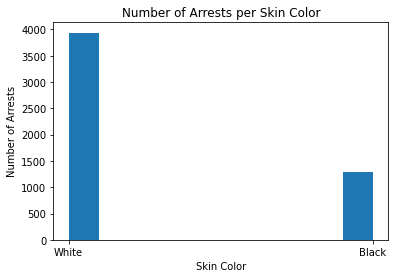

In [7]:

plt.hist(df['colour'])
plt.xlabel('Skin Color')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Skin Color')
plt.show()

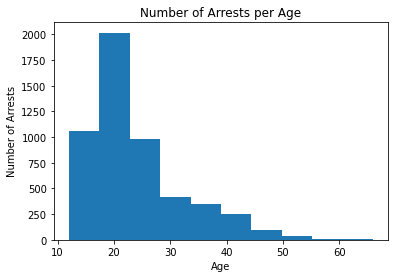

In [8]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Age')
plt.show()

In [9]:
df.describe(include='all')

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
count,5226.000000,5226,5226,5226.000000,5226.000000,5226,5226,5226,5226.000000
unique,NaN,2,2,NaN,NaN,2,2,2,NaN
top,NaN,Yes,White,NaN,NaN,Male,Yes,Yes,NaN
freq,NaN,4334,3938,NaN,NaN,4783,4111,4455,NaN
mean,2613.500000,NaN,NaN,1999.509376,23.846537,NaN,NaN,NaN,1.636433
std,1508.760584,NaN,NaN,1.390056,8.316133,NaN,NaN,NaN,1.539230
min,1.000000,NaN,NaN,1997.000000,12.000000,NaN,NaN,NaN,0.000000
25%,1307.250000,NaN,NaN,1998.000000,18.000000,NaN,NaN,NaN,0.000000
50%,2613.500000,NaN,NaN,2000.000000,21.000000,NaN,NaN,NaN,1.000000
75%,3919.750000,NaN,NaN,2001.000000,27.000000,NaN,NaN,NaN,3.000000


In [10]:
newdf = (df.loc[:,['colour','year','sex','age']])
newdf.shape

(5226, 4)

In [11]:
x = df[['colour','year','sex','age','employed','citizen']]
y = df['age']
x = pd.get_dummies(x[['colour','sex','employed','citizen']])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=1)

In [13]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)
y_predicted = dt.predict(x_test)
acc = accuracy_score(y_predicted, y_test)
print(acc)

0.09821428571428571


In [14]:
treedata = export_graphviz(dt, out_file = None, feature_names = x.columns, class_names = ['Black', 'White'], filled = True)
treegraph = graphviz.Source(treedata)
display(treegraph)

IndexError: list index out of range

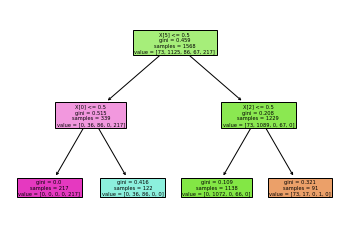

In [16]:
plt.figure()
clf = DecisionTreeClassifier(max_depth = 2).fit(x_test, y_predicted)
plot_tree(clf, filled=True)
plt.show()